# Machine Learning

## Load the data

In [1]:
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Load one of the datasets from the previous list

In [41]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## Select the variables for the model

**Both variables must be continuous**

1. y: the variable you want to predict
2. X: the variable you will use to calculate the prediction y

In [43]:
X=df[['weight']]
y=df.mpg

## The Linear Regression ML Model

### Fit the model with the data

In [44]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

In [45]:
model_lr.fit(X, y)

LinearRegression()

### Predictions

#### Calculate the predictions

In [46]:
y_pred = model_lr.predict(X)
y_pred

array([19.41852276, 17.96764345, 19.94053224, 19.96356207, 19.84073631,
       12.99320013, 12.8934042 , 13.21582182, 12.34836489, 16.76241567,
       18.96560276, 18.6124787 , 17.44563397, 22.62734576, 28.10844535,
       24.56952811, 25.0224481 , 26.45797418, 29.96618498, 32.23078495,
       25.80546233, 27.66320196, 28.08541552, 29.16781754, 25.98970097,
       10.88980898, 12.72451878, 12.67845912,  9.9916456 , 29.96618498,
       28.93751924, 29.2138772 , 30.61102023, 26.09717351, 19.91750241,
       20.76192952, 20.96919799, 21.07667053, 14.00651266, 12.04897709,
       14.42872621, 14.8739696 ,  8.27976155,  9.88417306,  6.85958869,
       23.57924541, 27.83208739, 21.12273019, 22.22048543, 29.27529008,
       30.01992125, 30.39607515, 30.46516464, 32.70673478, 33.93499239,
       32.23846156, 31.30959175, 28.83004669, 29.99689142, 29.01428534,
       27.83208739, 29.22923042, 13.50753301, 12.65542929, 14.57458181,
       14.62064147, 18.12885227, 10.75162999, 11.75726591, 12.11

#### Add them to the DataFrame

In [47]:
df['mpg_pred_lr'] = y_pred
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_pred_lr
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,19.418523
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,17.967643
...,...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,26.166263
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,25.436985


### Model evaluation

#### Calculate the model's score

In [48]:
r2 = model_lr.score(X, y)
r2

0.6917929800341573

#### Calculate the squared root of the score

- Isn't it the same than the `r` from Pearson's correlation?

In [49]:
import numpy as np

In [50]:
np.sqrt(r2)

0.831740933244335

### Model Interpretation

#### Visualize the model with the real data

In [51]:
import seaborn as sns

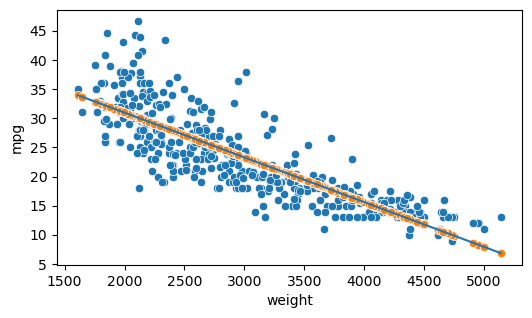

In [52]:
sns.scatterplot(data=df, x='weight', y='mpg')
sns.scatterplot(data=df, x='weight', y='mpg_pred_lr')
sns.lineplot(data=df, x='weight', y='mpg_pred_lr');

#### Add the legend to the chart

- Google may help

In [53]:
import matplotlib.pyplot as plt

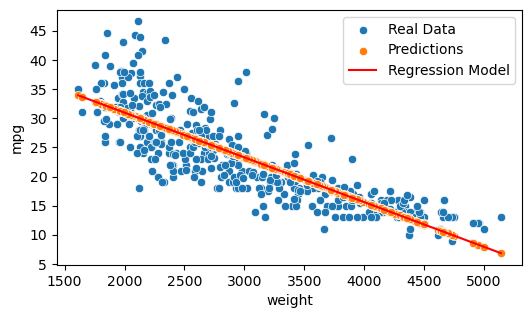

In [54]:
sns.scatterplot(data=df, x='weight', y='mpg', label='Real Data')
sns.scatterplot(data=df, x='weight', y='mpg_pred_lr', label='Predictions')
sns.lineplot(data=df, x='weight', y='mpg_pred_lr', color='red', label='Regression Model')
plt.legend();

#### Interpret the model's mathematical formula

In [55]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['weight'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00767661]),
 'rank_': 1,
 'singular_': array([16873.20281508]),
 'intercept_': 46.31736442026565}

$$
mpg = 1.98 + 0.94 \cdot weight
$$

## The Random Forest ML Model

Within `ensemble` module from `sklearn`

### Fit the model with the data

In [56]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

In [57]:
model_rf.fit(X, y)

RandomForestRegressor()

### Predictions

#### Calculate the predictions

In [58]:
y_pred = model_rf.predict(X)
y_pred

array([18.365     , 15.1       , 17.0455    , 16.0255    , 17.204     ,
       15.165     , 14.59      , 14.505     , 13.8675    , 15.727     ,
       16.918     , 15.882     , 14.564     , 16.996     , 26.459     ,
       21.918     , 19.419     , 22.546     , 33.37735675, 32.12728333,
       25.35966667, 27.23033333, 24.669     , 26.966     , 23.056     ,
       10.75      , 11.775     , 12.345     , 10.59      , 33.37735675,
       27.91759762, 24.423     , 29.0915    , 22.17633333, 16.498     ,
       17.253     , 18.59      , 18.07      , 14.71      , 13.53333333,
       14.51      , 13.715     , 11.95      , 12.59      , 12.42      ,
       19.86633333, 21.29833333, 18.304     , 17.955     , 24.3167619 ,
       27.46      , 31.74883333, 31.73303333, 32.599     , 34.346     ,
       28.72898333, 26.60833333, 23.85266667, 27.96966667, 24.31      ,
       21.29833333, 22.739     , 13.81      , 13.295     , 15.07      ,
       14.46      , 15.159     , 11.8       , 12.895     , 12.71

#### Add them to the DataFrame

In [59]:
df['mpg_pred_rf'] = y_pred
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_pred_lr,mpg_pred_rf
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,19.418523,18.365000
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,17.967643,15.100000
...,...,...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,26.166263,26.953000
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,25.436985,26.211943


### Model evaluation

#### Calculate the model's score

In [60]:
r2 = model_rf.score(X, y)
r2

0.9134159606017849

### Model Interpretation

#### Visualize the model with the real data

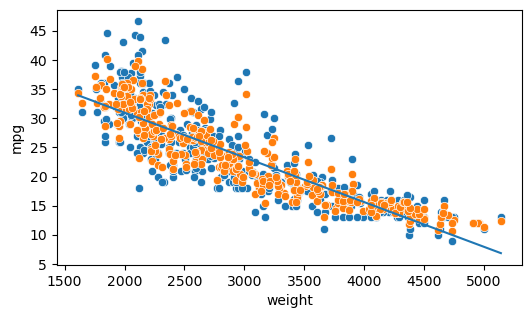

In [62]:
sns.scatterplot(data=df, x='weight', y='mpg')
sns.lineplot(data=df, x='weight', y='mpg_pred_lr')
sns.scatterplot(data=df, x='weight', y='mpg_pred_rf');

#### Add the legend to the chart

- Google may help

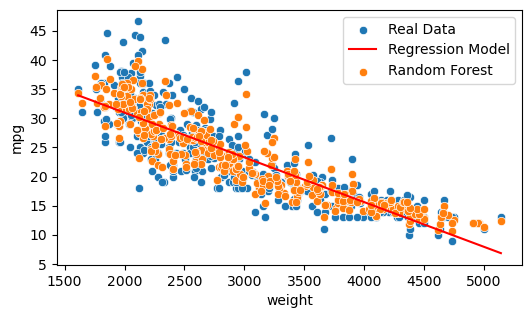

In [63]:
sns.scatterplot(data=df, x='weight', y='mpg', label='Real Data')
sns.lineplot(data=df, x='weight', y='mpg_pred_lr', color='red', label='Regression Model')
sns.scatterplot(data=df, x='weight', y='mpg_pred_rf', label='Random Forest')
plt.legend();

#### Interpret the model's mathematical formula

In [64]:
model_rf.__dict__

{'base_estimator': DecisionTreeRegressor(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'squared_error',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['weight'], dtype=object),
 'n_features_in_': 1,
 'n_outputs_': 1,
 'base_estimator_': DecisionTreeRegressor(),
 'estimators_': [DecisionTreeRegressor(max_features=1.0, random_state=1260217706),
  DecisionTreeRegressor(max_features=1.0, random_state=1073196532),
  DecisionTreeRegressor(m

## The K Nearest Neighbours ML Model

Within `svm` module from `sklearn`

### Fit the model with the data

In [65]:
from sklearn.svm import SVR

model_sv = SVR()

In [66]:
model_sv.fit(X, y)

SVR()

### Predictions

#### Calculate the predictions

In [67]:
y_pred = model_sv.predict(X)
y_pred

array([17.92921253, 16.98879134, 18.29722869, 18.31390644, 18.2254043 ,
       14.07649952, 14.02361389, 14.1967393 , 13.74839163, 16.263232  ,
       17.62412146, 17.39417297, 16.67089741, 20.5457109 , 27.44930546,
       22.62188839, 23.16930578, 25.06422603, 29.94932114, 31.55368898,
       24.17406248, 26.79833138, 27.41574209, 28.94598857, 24.42083862,
       13.18131067, 13.93572703, 13.9121357 , 13.01221939, 29.94932114,
       28.63203337, 29.00769447, 30.6254116 , 24.56650742, 18.28058975,
       18.91741532, 19.08262823, 19.16975388, 14.64255811, 13.60911562,
       14.88803111, 15.14942447, 13.20426456, 13.00346408, 13.91140819,
       21.51030887, 27.04555756, 19.20740318, 20.16227088, 29.0893527 ,
       30.01089804, 30.41608965, 30.48523584, 31.57738734, 31.09527955,
       31.55501801, 31.17641606, 28.48275723, 29.98461424, 28.73763366,
       27.04555756, 29.02817611, 14.35832425, 13.90040401, 14.97346531,
       15.00049108, 17.08862166, 13.14485336, 13.4833442 , 13.63

#### Add them to the DataFrame

In [68]:
df['mpg_pred_sv'] = y_pred
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_pred_lr,mpg_pred_rf,mpg_pred_sv
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,19.418523,18.365000,17.929213
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,17.967643,15.100000,16.988791
...,...,...,...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,26.166263,26.953000,24.660799
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,25.436985,26.211943,23.692152


### Model evaluation

#### Calculate the model's score

In [69]:
r2 = model_sv.score(X, y)
r2

0.702445706061313

### Model Interpretation

#### Visualize the model with the real data

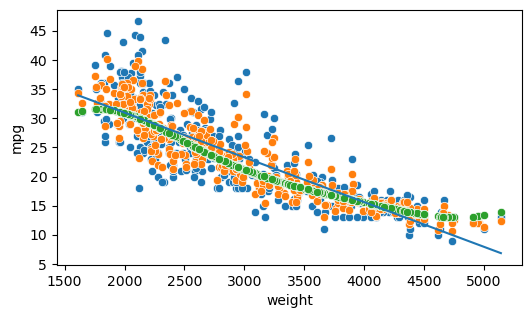

In [71]:
sns.scatterplot(data=df, x='weight', y='mpg')
sns.lineplot(data=df, x='weight', y='mpg_pred_lr')
sns.scatterplot(data=df, x='weight', y='mpg_pred_rf')
sns.scatterplot(data=df, x='weight', y='mpg_pred_sv');

#### Add the legend to the chart

- Google may help

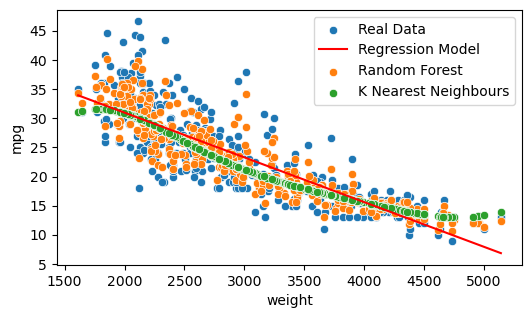

In [72]:
sns.scatterplot(data=df, x='weight', y='mpg', label='Real Data')
sns.lineplot(data=df, x='weight', y='mpg_pred_lr', color='red', label='Regression Model')
sns.scatterplot(data=df, x='weight', y='mpg_pred_rf', label='Random Forest')
sns.scatterplot(data=df, x='weight', y='mpg_pred_sv', label='K Nearest Neighbours')
plt.legend();

#### Interpret the model's mathematical formula

In [73]:
model_sv.__dict__

{'kernel': 'rbf',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'C': 1.0,
 'nu': 0.0,
 'epsilon': 0.1,
 'shrinking': True,
 'probability': False,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': None,
 '_sparse': False,
 'feature_names_in_': array(['weight'], dtype=object),
 'n_features_in_': 1,
 'class_weight_': array([], dtype=float64),
 '_gamma': 1.3979383481521457e-06,
 'support_': array([  1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  37,  38,  39,  40,  41,
         42,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  65,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  97,
         98,  99, 100, 101, 102, 103

## Choose the best model

### Visualize all models

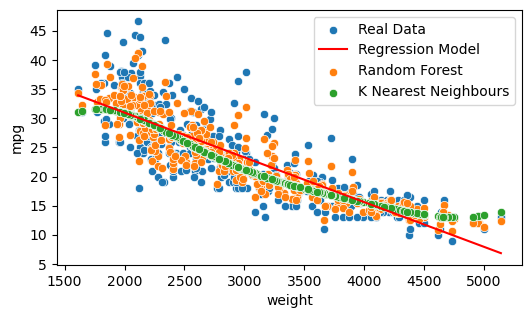

In [36]:
sns.scatterplot(data=df, x='weight', y='mpg', label='Real Data')
sns.lineplot(data=df, x='weight', y='mpg_pred_lr', color='red', label='Regression Model')
sns.scatterplot(data=df, x='weight', y='mpg_pred_rf', label='Random Forest')
sns.scatterplot(data=df, x='weight', y='mpg_pred_sv', label='K Nearest Neighbours')
plt.legend();

### Calculate the score

In [37]:
model_lr.score(X, y)

0.6917929800341573

In [38]:
model_rf.score(X, y)

0.9147710946380858

In [40]:
model_sv.score(X, y)

0.702445706061313